In [ ]:
from tensor import Tensor
from nn import Neuron, Layer, MLP
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
X, y = make_moons(n_samples=200, noise=0.1)

In [ ]:
y = y*2 - 1; y

array([-1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,
        1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1,
        1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1,
        1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,
        1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1])

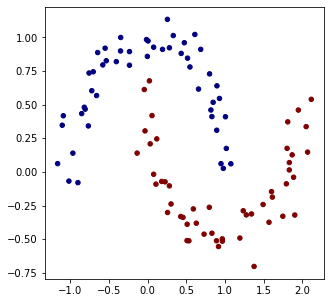

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [ ]:
model = MLP(2, [16, 16, 1])
model

In [ ]:
model.parameters()

[Tensor(data=0.35080536494663694, grad=0.0),
 Tensor(data=-0.11946954567433843, grad=0.0),
 Tensor(data=-0.6270508671056498, grad=0.0),
 Tensor(data=-0.768624702020356, grad=0.0),
 Tensor(data=0.2524761852521873, grad=0.0),
 Tensor(data=-0.006611837749302296, grad=0.0),
 Tensor(data=0.7110414383810499, grad=0.0),
 Tensor(data=-0.6623740202457458, grad=0.0),
 Tensor(data=-0.18890448497828105, grad=0.0),
 Tensor(data=0.8809332801629677, grad=0.0),
 Tensor(data=-0.12487209957335854, grad=0.0),
 Tensor(data=0.22331414403062255, grad=0.0),
 Tensor(data=0.5522541166732813, grad=0.0),
 Tensor(data=-0.19362365578133645, grad=0.0),
 Tensor(data=-0.9407772242993484, grad=0.0),
 Tensor(data=-0.7665063230673539, grad=0.0),
 Tensor(data=0.02410856142814155, grad=0.0),
 Tensor(data=0.7331747851327206, grad=0.0),
 Tensor(data=0.06237286977006051, grad=0.0),
 Tensor(data=0.7836853557901362, grad=0.0),
 Tensor(data=-0.3300408611644181, grad=0.0),
 Tensor(data=0.07982134360167681, grad=0.0),
 Tensor(dat

In [ ]:
import numpy as np

In [ ]:
def loss(batch_size=None):
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Tensor, xrow)) for xrow in Xb]
    
    scores = list(map(model, inputs))
    
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy)/len(accuracy)

In [ ]:
total_loss, acc = loss()
print(total_loss, acc)

Tensor(data=1.617137930645234, grad=0.0) 0.14


In [ ]:
for k in range(50):
    total_loss, acc = loss()
    
    model.zero_grad()
    total_loss.backward()
    
    lr = 1.0 - 0.9*k / 100
    for p in model.parameters():
        p.data -= lr * p.grad
    
    if k % 1 == 0:
        print(f'Step {k} loss {total_loss.data}, accuracy {acc*100}%')

Step 0 loss 1.617137930645234, accuracy 14.000000000000002%
Step 1 loss 1.1185990221529352, accuracy 41.0%
Step 2 loss 0.4858105934649925, accuracy 76.0%
Step 3 loss 0.4461945328077441, accuracy 78.0%
Step 4 loss 0.39785817532562484, accuracy 81.0%
Step 5 loss 0.35560976433994834, accuracy 83.0%
Step 6 loss 0.3207001503360551, accuracy 85.0%
Step 7 loss 0.2640017140466841, accuracy 89.0%
Step 8 loss 0.2391127353061276, accuracy 91.0%
Step 9 loss 0.2290346387008482, accuracy 91.0%
Step 10 loss 0.21730999272510518, accuracy 92.0%
Step 11 loss 0.20896070550147408, accuracy 92.0%
Step 12 loss 0.2005884326520601, accuracy 92.0%
Step 13 loss 0.19252850805714378, accuracy 93.0%
Step 14 loss 0.18396427651320202, accuracy 94.0%
Step 15 loss 0.17469798729618605, accuracy 94.0%
Step 16 loss 0.1651588184229799, accuracy 94.0%
Step 17 loss 0.15599674850124623, accuracy 94.0%
Step 18 loss 0.14780733142563945, accuracy 97.0%
Step 19 loss 0.1412382661426482, accuracy 95.0%
Step 20 loss 0.1388930590482

(-1.7031818800234135, 2.0468181199765865)

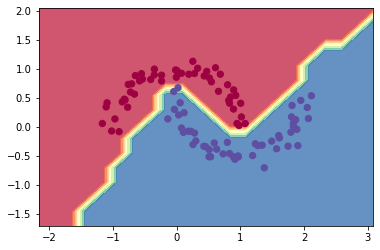

In [ ]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Tensor, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())